<a href="https://colab.research.google.com/github/vidhi-sys/ML_Basics/blob/main/spotify_wrapped.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv("spotify-2023.csv", encoding="latin1")
df.head()



,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [7]:
audio_features = [
    'danceability_%',
    'energy_%',
    'valence_%',
    'acousticness_%',
    'instrumentalness_%',
    'liveness_%',
    'speechiness_%',
    'bpm'
]

X = df[audio_features]


In [10]:
X = X.fillna(X.mean())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



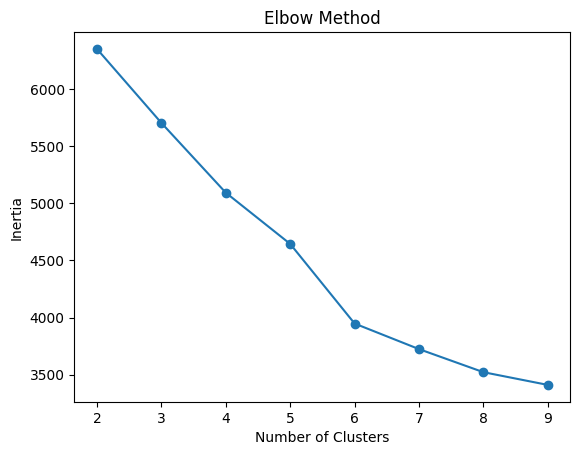

In [11]:
inertia = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters


In [21]:
silhouette = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.17811059943821672


In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['pca1'] = X_pca[:, 0]
df['pca2'] = X_pca[:, 1]


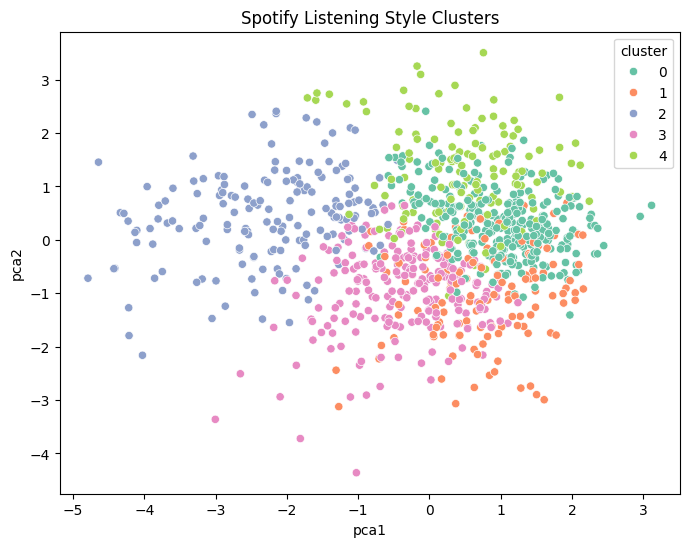

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca1',
    y='pca2',
    hue='cluster',
    palette='Set2',
    data=df
)
plt.title("Spotify Listening Style Clusters")
plt.show()


In [25]:
dbscan = DBSCAN(eps=1.2, min_samples=5)
db_clusters = dbscan.fit_predict(X_scaled)

df['dbscan_cluster'] = db_clusters


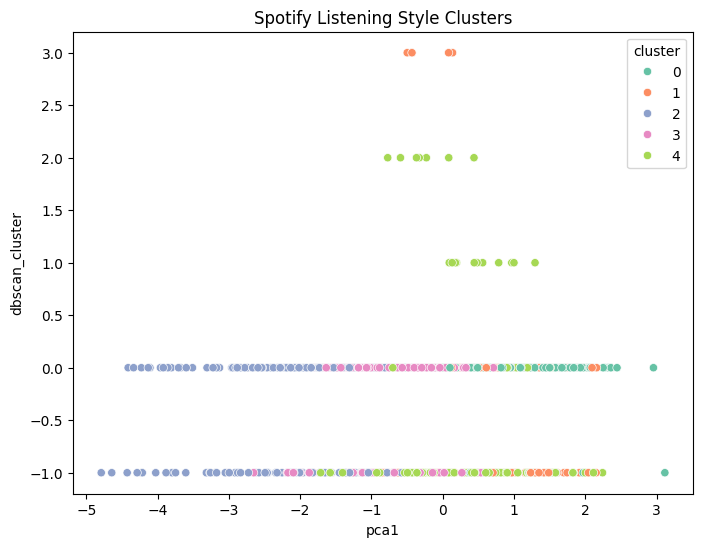

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='pca1',
    y='dbscan_cluster',
    hue='cluster',
    palette='Set2',
    data=df
)
plt.title("Spotify Listening Style Clusters")
plt.show()

In [24]:
cluster_summary = df.groupby('cluster')[audio_features].mean()
cluster_summary


,danceability_%,energy_%,valence_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,bpm
cluster,,,,,,,,
0,77.260726,71.290429,69.613861,19.815182,0.478548,12.861386,7.033003,116.369637
1,67.627907,73.728682,55.620155,16.224806,0.069767,43.503876,8.124031,116.387597
2,54.508876,41.887574,36.627219,67.544379,2.662722,16.390533,6.508876,118.041420
3,57.810811,67.288288,35.666667,13.040541,4.022523,13.873874,6.040541,134.981982
4,74.169231,62.530769,51.061538,25.992308,0.076923,15.369231,31.038462,127.630769
